In [61]:
from gym import Env
import numpy as np
import gym.spaces as spaces
import Game
import gym
import numpy as np
from stable_baselines3 import PPO
import Game
import random

In [62]:

class env2048(Env):
    def __init__(self, size = 4):
        self.size = size
        self.action_space=spaces.Box(0, 1.0, (3,))
        self.observation_space = spaces.Box(low=0, high=20, shape=(size, size), dtype=np.float32)
        self.state = np.zeros(shape=(size, size))
        self.randomBlock()
    
    def filled(self):
        for i in range(self.size):
            for j in range(self.size):
                if self.state[i][j] == 0:
                    return False
        return True
    def randomBlock(self):
        x = np.random.randint(0, self.size)
        y = np.random.randint(0, self.size)
        while self.state[x][y] != 0:
            x = np.random.randint(0, self.size)
            y = np.random.randint(0, self.size)
        self.state[x][y] = random.randint(1, 2)
    def left(self):
        change = False
        for i in range(self.size):
            prev = 0
            for j in range(1, self.size):
                if self.state[i][j] == 0:
                    continue
                if self.state[i][prev] == self.state[i][j]:
                    self.state[i][prev] += 1
                    self.state[i][j] = 0
                    change = True
                    continue
                if self.state[i][prev] == 0:
                    self.state[i][prev], self.state[i][j] = self.state[i][j], self.state[i][prev]
                    change = True
                    continue
                if self.state[i][prev] != self.state[i][j]:
                    self.state[i][prev + 1], self.state[i][j] = self.state[i][j], self.state[i][prev + 1]
                    prev += 1
                    change = True
        return change
    def right(self):
        change = False
        for i in range(self.size):
            prev = self.size - 1
            for j in range(self.size - 2, -1, -1):
                if self.state[i][j] == 0:
                    continue
                if self.state[i][prev] == self.state[i][j]:
                    self.state[i][prev] += 1
                    self.state[i][j] = 0
                    change = True
                    continue
                if self.state[i][prev] == 0:
                    self.state[i][prev], self.state[i][j] = self.state[i][j], self.state[i][prev]
                    change = True
                    continue
                if self.state[i][prev] != self.state[i][j]:
                    self.state[i][prev - 1], self.state[i][j] = self.state[i][j], self.state[i][prev - 1]
                    prev -= 1
                    change = True
        return change
    def up(self):
        change = False
        for i in range(self.size):
            prev = 0
            for j in range(1, self.size):
                if self.state[j][i] == 0:
                    continue
                if self.state[prev][i] == self.state[j][i]:
                    self.state[prev][i] += 1
                    self.state[j][i] = 0
                    change = True
                    continue
                if self.state[prev][i] == 0:
                    self.state[prev][i], self.state[j][i] = self.state[j][i], self.state[prev][i]
                    change = True
                    continue
                if self.state[prev][i] != self.state[j][i]:
                    self.state[prev + 1][i], self.state[j][i] = self.state[j][i], self.state[prev + 1][i]
                    prev += 1
                    change = True
        return change
    def down(self):
        change = False
        for i in range(self.size):
            prev = self.size - 1
            for j in range(self.size - 2, -1, -1):
                if self.state[j][i] == 0:
                    continue
                if self.state[prev][i] == self.state[j][i]:
                    self.state[prev][i] += 1
                    self.state[j][i] = 0
                    change = True
                    continue
                if self.state[prev][i] == 0:
                    self.state[prev][i], self.state[j][i] = self.state[j][i], self.state[prev][i]
                    change = True
                    continue
                if self.state[prev][i] != self.state[j][i]:
                    self.state[prev - 1][i], self.state[j][i] = self.state[j][i], self.state[prev - 1][i]
                    prev -= 1
                    change = True
        return change
    def move(self, action):
        if action == 0:
            return self.left()
        if action == 1:
            return self.right()
        if action == 2:
            return self.up()
        if action == 3:
            return self.down()
    def reward(self):
        reward = 0
        for i in range(self.size):
            for j in range(self.size):
                reward += self.state[i][j]
        return reward
    def done(self):
        for i in range(self.size - 1):
            for j in range(self.size - 1):
                if self.state[i][j] == 0 or self.state[i][j] == self.state[i][j + 1] or self.state[i][j] == self.state[i + 1][j]:
                    return False
        for i in range(self.size):
            if self.state[self.size - 1][i] == 0 or self.state[i][self.size - 1] == 0:
                return False
        return True
    def step(self, inputs):
        action = np.argmax(inputs)
        inputs[action] = -1
        while (self.move(action) == False):
            action = np.argmax(inputs)
            inputs[action] = -1
        self.render()
        self.randomBlock()
        info = {}
        done = self.done()
        reward = 1
        if done:
            reward = -1
        return self.state, reward, done, info
    def render(self):
        return
        print(self.state)
    def close(self):
        pass
    def reset(self):
        self.state = np.zeros(shape=(4, 4))
        self.randomBlock()
        return self.state


In [63]:
env = Game.test2048()

model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 50       |
|    ep_rew_mean     | -28.1    |
| time/              |          |
|    fps             | 6336     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 50           |
|    ep_rew_mean          | -28.9        |
| time/                   |              |
|    fps                  | 4078         |
|    iterations           | 2            |
|    time_elapsed         | 1            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0047872076 |
|    clip_fraction        | 0.0314       |
|    clip_range           | 0.2          |
|    en

In [64]:
obs = env.reset()
done = False
obsPlot, rewardPlot, actionPlot = [], [], []
while not done:
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    obsPlot.append(obs)
    rewardPlot.append(reward)
    actionPlot.append(np.argmax(action))

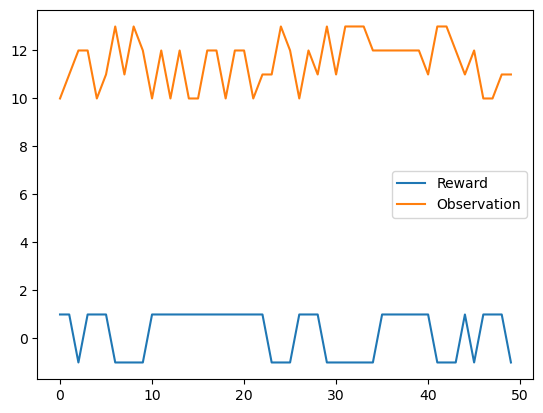

In [65]:
import matplotlib.pyplot as plt
plt.plot(rewardPlot, label='Reward')
# plt.plot(actionPlot, label='Action')
plt.plot(obsPlot, label='Observation')
plt.legend()

In [66]:
np.random.randint(-1, 2)

1